# Compound design: elaborating existing hits using databases

<font size="3">This part of the practical will involve downloading data about molecules in the aminopyradine-like site from Fragalysis using the python API (https://github.com/xchem/fragalysis-api) and using the Fragment Network to find new molecules that are elaborations of the initial hits.
</font>



## Using the Fragment Network database to retrieve elaborations
----

The Fragment Network is a graph database created by Astex Pharmaceuticals (https://doi.org/10.1021/acs.jmedchem.7b00809). It can be built from a set of molecules by recursive fragmentation based on their ring systems and the substituents of those rings. That network forms a directed acyclic graph that can be traversed to identify similar molecules based on sharing common fragments.

The relationships between different molecules are represented by edges on the graph, with the nodes describing the molecules. The transformations along the edges of the graph are described by SMARTS reaction patterns, and can represent changes to a molecule by either additions, substitutions or replacement of linkers.
    
<br>
<img src="https://www.informaticsmatters.com/assets/images/fragment-network/fragmentation-4.png">
<br>

<font size="3">
    
This part of the practical will show how we can explore the Fragment network as above, but programatically.

In the cell below, we will use the fragalysis API to get a pandas dataframe of all of the molecules in the aminopyradine-like site. Run the cell to generate the output. If you want to play with the data, you can display the top part of the dataframe with:
</font>

```python 
display(aminopyradine_site_mols.head())
```

In [5]:
from fragalysis_api import GetMolgroupData

search = GetMolgroupData()
aminopyradine_site_mols = search.get_site_mol_table(target='Mpro', site_name='Aminopyridine-like')

# comment to skip table display
display(aminopyradine_site_mols.head()) 


[68]
https://fragalysis.diamond.ac.uk/api/molecules/?prot_id__target_id=68


,id,smiles,cmpd_id,prot_id,protein_code,mol_type,molecule_protein,lig_id,chain_id,sdf_info,...,z_com,mw,logp,tpsa,ha,hacc,hdon,rots,rings,velec
0,39079,CS(=O)(=O)NCC[C@@H](C(=O)Nc1cccnc1)c1ccccc1,5050,40981,Mpro-x10889_1A:ADA-UNI-f8e79267-2,PR,/media/pdbs/Mpro-x10889_1A_apo.pdb,LIG,Z,\n RDKit 3D\n\n 23 24 0 0 0 0...,...,None,333.11,1.74,88.16,23,4,2,7,2,122
1,39479,CC(=O)Nc1cnccc1C,10148,79642,Mpro-x0107_0A:MAK-UNK-6435e6c2-8,PR,/media/pdbs/Mpro-x0107_0A_apo.pdb,LIG,Z,\n RDKit 3D\n\n 11 11 0 0 0 0...,...,None,150.08,1.35,41.99,11,2,1,1,1,58
2,39497,O=C(Nc1ccccc1)Nc1cccnc1,10166,79660,Mpro-x0434_0A:AAR-POS-d2a4d1df-11,PR,/media/pdbs/Mpro-x0434_0A_apo.pdb,LIG,Z,\n RDKit 3D\n\n 16 17 0 0 0 0...,...,None,213.09,2.73,54.02,16,2,2,2,2,80
3,39503,O=C(CC1CCCCC1)Nc1cccnc1,10172,79666,Mpro-x0678_0A:ALE-HEI-f28a35b5-9,PR,/media/pdbs/Mpro-x0678_0A_apo.pdb,LIG,Z,\n RDKit 3D\n\n 16 17 0 0 0 0...,...,None,218.14,2.99,41.99,16,2,1,3,2,86
4,39532,Cc1ccncc1NC(=O)CNc1ccnc2ccccc12,10201,79695,Mpro-x10019_0A:GAB-REV-70cc3ca5-4,PR,/media/pdbs/Mpro-x10019_0A_apo.pdb,LIG,Z,\n RDKit 3D\n\n 22 24 0 0 0 0...,...,None,292.13,2.99,66.91,22,4,2,4,3,110



<font size="3">
We will now use the information about the molecules in the aminopyradine-like site to enumerate the graph-network from the fragalysis API.  
    
<br>
    
We can search the Fragment Network for enumerations by using the smiles string of the molecule we are interested in elaborating. For example:
    
</font>

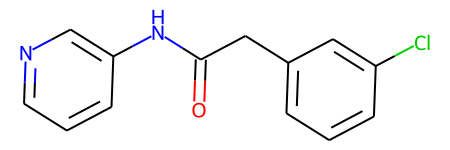

In [18]:
from fragalysis_api.xcanalyser.graphcreator import xcgraphcreator
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

smiles = 'C1=CC=NC=C1NC(=O)CC1=CC=CC(Cl)=C1'
mol = Chem.MolFromSmiles(smiles)
mol #Visualize the molecule


In [19]:
graph_search = xcgraphcreator(smiles)
display(graph_search.head())

,type,insert_smiles,new_smiles,insertion
0,LINKER,Cl[Xe].O=C(C[Xe])Nc1cccnc1,O=C(Cn1cc(Cl)cn1)Nc1cccnc1,[100Xe]C1CCC([101Xe])C1
1,LINKER,Cl[Xe].O=C(C[Xe])Nc1cccnc1,O=C(Cc1ccc(Cl)s1)Nc1cccnc1,[100Xe]C1CCC([101Xe])C1
2,LINKER,Cl[Xe].O=C(C[Xe])Nc1cccnc1,O=C(Cc1ccc(Cl)cn1)Nc1cccnc1,[100Xe]C1CCC([101Xe])CC1
3,LINKER,Cl[Xe].O=C(C[Xe])Nc1cccnc1,O=C(Cc1ccc(Cl)cc1)Nc1cccnc1,[100Xe]C1CCC([101Xe])CC1
4,LINKER,Cl[Xe].O=C(C[Xe])Nc1cccnc1,O=C(Cc1cnccc1Cl)Nc1cccnc1,[100Xe]C1CCCCC1[101Xe]



<font size="3">

This will return a pandas dataframe containing information about the results from the graph-network enumeration. 

**Column descriptions:**
- ``type``: the type of operation used to generate the elaborated molecules
- ``insert_smiles``: the smiles string of the original molecule with ``[Xe]`` in the position where the change is made
- ``new_smiles``: the complete smiles string of the new elaborated molecule
- ``insertion``: a smarts-formated code describing what to insert into ``insert_smiles`` to create the full smiles of the new molecule

In order to visualize the suggested compounds, copy-paste the new_smiles of the first examples into https://www.simolecule.com/cdkdepict/depict.html

HINT: you can interate over the dataframe
    
```python
for smi in graph_search.head(10)["new_smiles"]:
    print(smi)
```
</font>


<font size="3">

This will return a pandas dataframe containing information about the results from the graph-network enumeration. 

**Column descriptions:**
- ``type``: the type of operation used to generate the elaborated molecules
- ``insert_smiles``: the smiles string of the original molecule with ``[Xe]`` in the position where the change is made
- ``new_smiles``: the complete smiles string of the new elaborated molecule
- ``insertion``: a smarts-formated code describing what to insert into ``insert_smiles`` to create the full smiles of the new molecule

### Exercise
----
1. Using the information from the dataframe ``aminopyradine_site_mols`` enumerate the graph-network for a random subset of 10 molecules to find all possible enumerations
2. Write out the following files:
    - an sdf file for all of the molecules from the aminopyradine site, with the molecule appropriatley named by its fagalysis label (``protein_code``).
    - a csv file for all of the enumerations, with one column (``initial_hit``) containing the fragalysis label for the initial hit that the enumeration came from, and a second column (``elaboration_smiles``) containing the smiles string for the elaboration.
    
Write the code to generate your output files in the cell below. **Don't forget to download this jupyter notebook, and the files you generate!**
    


**Hints & tips**:
- You can iterate through a pandas dataframe with ``<dataframe>.iterrows()``. Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html.
  You can also consider using ``<dataframe>[LABEL].map(function)`` to execute the same function over the elements of a column (https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).
- You can use rdkit to create molecules from a mol block (i.e. ``sdf_info`` from ``aminopyradine_site_mols``). Documentation: https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolFromMol2Block
- You can use rdkit to write out sdf files from a set of molecules. Example:https://www.rdkit.org/docs/GettingStartedInPython.html#writing-sets-of-molecules
- You can write out a csv file directly from a pandas dataframe. Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
- pandas and rdkit are both available in this environment
    
</font>

In [ ]:
# write your code here